In [1]:
import json
import glob
import os
import calendar

In [2]:
import numpy as np 
import pandas as pd                  # for DataFrames
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing
import scipy.fftpack                 # discrete Fourier transforms
from scipy import signal
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import chirp, peak_widths

In [4]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from datetime import datetime


In [5]:
import re

In [25]:
# Directory path
day = "GalaxtWatchTests/02-17-2024"
directory_path = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/02-28-2023"


In [26]:
directory_path

'/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/02-28-2023'

In [27]:
def filtering_plots(df):
    # Setting fonts and styles
    title_font = 12
    axis_font = 40
    font = {'family': 'Sans'}
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=50)
    plt.rc('ytick', labelsize=50)
    # Create a 2x3 grid of subplots (2 rows, 3 columns)
    fig, axs = plt.subplots(2, 3, figsize=(30, 20))  # Adjust figsize as needed
    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the space between the plots

    # Plotting Accelerometer data
    axs[0, 0].plot(df['X'], color="#171ad1", linestyle='--', label="Raw Data")
    # axs[0, 0].plot(df["Filtered_Accel_X"], color="#478F96", linewidth=4, label="Moving Average")
    axs[0, 0].set_title('Acceleration X', fontsize=title_font)
    axs[0, 0].legend(loc='upper right')

    axs[0, 1].plot(df['Y'], color="#171ad1", linestyle='--', label="Raw Data")
    # axs[0, 1].plot(df["Filtered_Accel_Y"], color="#478F96", linewidth=4, label="Moving Average")
    axs[0, 1].set_title('Acceleration Y', fontsize=title_font)
    axs[0, 1].legend(loc='upper right')

    axs[0, 2].plot(df['Z'], color="#171ad1", linestyle='--', label="Raw Data")
    # axs[0, 2].plot(df["Filtered_Accel_Z"], color="#478F96", linewidth=4, label="Moving Average")
    axs[0, 2].set_title('Acceleration Z', fontsize=title_font)
    axs[0, 2].legend(loc='upper right')

    # # Plotting Gyroscope data
    axs[1, 0].plot(df['Z'], color="#171ad1", linestyle='--', label="Raw Data") 
    return plt

In [28]:
def average_sampling_rate(df):
    sr_dict = df["formatted_timestamp"].value_counts().to_dict()
    #print("sr_dict",sr_dict)
    # Step 1: Calculate the sum of all values
    total_sum = sum(sr_dict.values())
    # Step 2: Count the number of values
    num_values = len(sr_dict)
    if num_values !=0:
        # print("num_values: ",num_values)
        # print("total_sum: ",total_sum)
        # Step 3: Calculate the average
        average_sr = total_sum / num_values
        return average_sr
    else:
        return "na"

In [29]:
# Function to convert timestamp string to formatted time string
def convert_to_time(timestamp):
    dt_object = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
    time_only = dt_object.time()
    formatted_time = time_only.strftime('%H:%M:%S')
    return formatted_time


In [30]:
def file_count(directory_path, specific_string):
    num_values_in_file =[]
    avg_sample_Rate = []
    file_name = []
    df_lists = []
    # Get all files in the directory
    files = os.listdir(directory_path)
    # Filter files containing the specific string in the name
    filtered_files = [file for file in files if specific_string in file]
    # Initialize an empty Pandas DataFrame
    df = pd.DataFrame()
    # Loop through the filtered files and read them into the DataFrame
    for file in filtered_files:
        file_path = os.path.join(directory_path, file)
        print("file_path = ",file_path)
        df = pd.read_csv(file_path)
        # # Assuming the files are CSV, you can adjust the read function accordingly
        # temp_df = pd.read_csv(file_path)
        # df = pd.concat([df, temp_df], ignore_index=True)
        # Apply the function to each row in the DataFrame and create a new column
        df['formatted_timestamp'] = df['Timestamp'].apply(lambda x: convert_to_time(x))
        avg_sr = average_sampling_rate(df)
        print("Number of samples per file: ",df.shape[0])
        # print("Average Sampling Rate: ",avg_sr, "of File name: ",file)
        num_values_in_file.append(df.shape[0])
        file_name.append(file)
        avg_sample_Rate.append(avg_sr)
        df_lists.append(df)

    fig = go.Figure(data=[
        go.Bar(x=file_name, y=num_values_in_file,text=num_values_in_file,textposition='auto'),
        # go.Bar(x=animals, y=[12, 18, 29])
    ])
    # Change the bar mode
    fig.update_layout(title_text="Number of samples per file") # barmode='group'
    fig.show()
    
    fig1 = go.Figure(data=[
        go.Bar(x=file_name, y=avg_sample_Rate,text=avg_sample_Rate,textposition='auto'),
        # go.Bar(x=animals, y=[12, 18, 29])
    ])
    # Change the bar mode
    fig1.update_layout(title_text="Avg Sample Rate") # barmode='group'
    fig1.show()
    df_lists_acc = pd.concat(df_lists)
    # Display the count of files containing the specific string
    print(f"Number of files containing '{specific_string}': {len(filtered_files)}")
    return len(filtered_files),num_values_in_file,df_lists_acc,file_name

file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/02-28-2023/acc_2024-02-28_16_49_57.648.csv
Number of samples per file:  15041
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/02-28-2023/acc_2024-02-28_16_29_50.536.csv
Number of samples per file:  15043
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/02-28-2023/acc_2024-02-28_16_04_40.856.csv
Number of samples per file:  15022
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/02-28-2023/acc_2024-02-28_16_34_52.204.csv
Number of samples per file:  15042
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub_CareWear/Carewear-DataTesting2024/02-28-2023/acc_2024-02-28_16_39_54.057.csv
Numbe

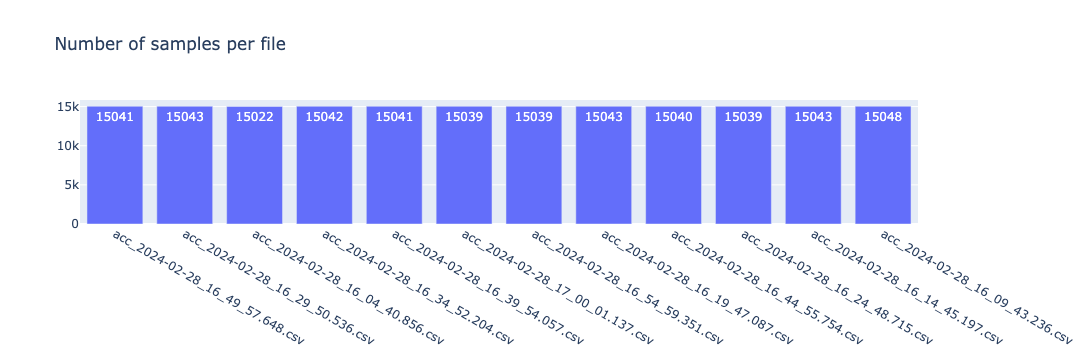

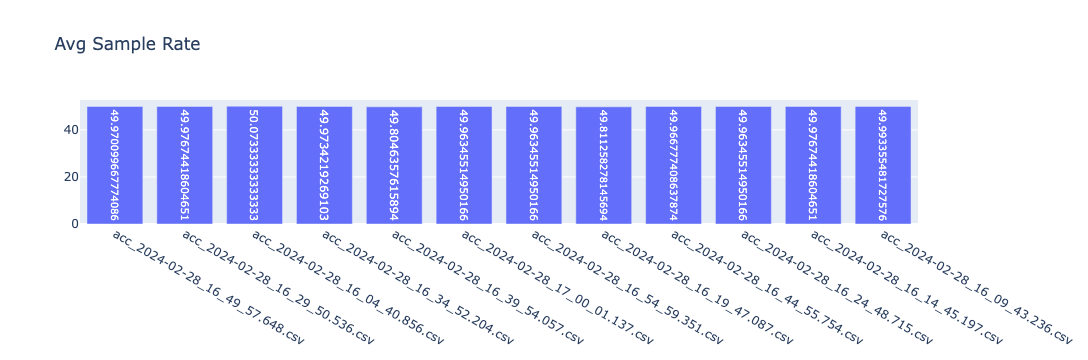

Number of files containing 'acc': 12


In [31]:
file_count_acc,num_values_in_file,df_lists_acc,file_name = file_count(directory_path, "acc")

In [33]:
# Parse the given timestamp
base_timestamp = datetime.strptime('2024-02-22_16_20_12.154', '%Y-%m-%d_%H_%M_%S.%f')

# Calculate the time difference for each timestamp
time_diffs = []
for timestamp in file_name:
    timestamp_datetime = datetime.strptime(timestamp[4:-4], '%Y-%m-%d_%H_%M_%S.%f')
    diff = timestamp_datetime - base_timestamp
    diff_minutes = diff.total_seconds() / 60
    time_diffs.append(diff_minutes)

print(time_diffs)

[8669.758233333334, 8649.6397, 8624.478366666666, 8654.6675, 8659.698383333332, 8679.816383333333, 8674.786616666666, 8639.582216666668, 8664.726666666666, 8644.60935, 8634.550716666667, 8629.518033333334]


In [34]:

sorted_df = df_lists_acc.sort_values(by='formatted_timestamp', ascending=True)


In [35]:
for i in sorted_df["formatted_timestamp"].unique():
    print(i)

15:59:41
15:59:42
15:59:43
15:59:44
15:59:45
15:59:46
15:59:47
15:59:48
15:59:49
15:59:50
15:59:51
15:59:52
15:59:53
15:59:54
15:59:55
15:59:56
15:59:57
15:59:58
15:59:59
16:00:00
16:00:01
16:00:02
16:00:03
16:00:04
16:00:05
16:00:06
16:00:07
16:00:08
16:00:09
16:00:10
16:00:11
16:00:12
16:00:13
16:00:14
16:00:15
16:00:16
16:00:17
16:00:18
16:00:19
16:00:20
16:00:21
16:00:22
16:00:23
16:00:24
16:00:25
16:00:26
16:00:27
16:00:28
16:00:29
16:00:30
16:00:31
16:00:32
16:00:33
16:00:34
16:00:35
16:00:36
16:00:37
16:00:38
16:00:39
16:00:40
16:00:41
16:00:42
16:00:43
16:00:44
16:00:45
16:00:46
16:00:47
16:00:48
16:00:49
16:00:50
16:00:51
16:00:52
16:00:53
16:00:54
16:00:55
16:00:56
16:00:57
16:00:58
16:00:59
16:01:00
16:01:01
16:01:02
16:01:03
16:01:04
16:01:05
16:01:06
16:01:07
16:01:08
16:01:09
16:01:10
16:01:11
16:01:12
16:01:13
16:01:14
16:01:15
16:01:16
16:01:17
16:01:18
16:01:19
16:01:20
16:01:21
16:01:22
16:01:23
16:01:24
16:01:25
16:01:26
16:01:27
16:01:28
16:01:29
16:01:30
16:01:31
1

In [29]:
# Assuming your DataFrame is named df and the timestamp column is named 'timestamp_column'
# Convert timestamp column to datetime format
sorted_df['formatted_timestamp'] = pd.to_datetime(sorted_df['formatted_timestamp'])

# Define the time range
start_time = pd.to_datetime('14:02:07').time()
end_time = pd.to_datetime('15:28:03').time()

# Subset rows within the specified time range
subset_df = sorted_df[(sorted_df['formatted_timestamp'].dt.time >= start_time) & (sorted_df['formatted_timestamp'].dt.time <= end_time)]

In [32]:
subset_df['formatted_timestamp'] = subset_df['Timestamp'].apply(lambda x: convert_to_time(x))
avg_sr = average_sampling_rate(subset_df)
print("avg_sr: ",avg_sr)


avg_sr:  41.00769230769231


file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_10_11_13.824.csv
Number of samples per file:  9005
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_11_05_33.317.csv
Number of samples per file:  9393
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_11_10_34.573.csv
Number of samples per file:  15033
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/gry_2024-02-22_11_15_36.471.csv
Number of samples per file:  15033
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024

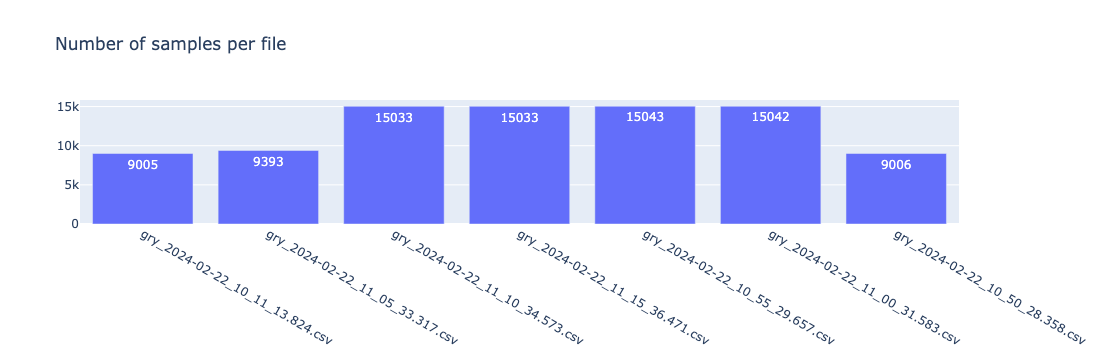

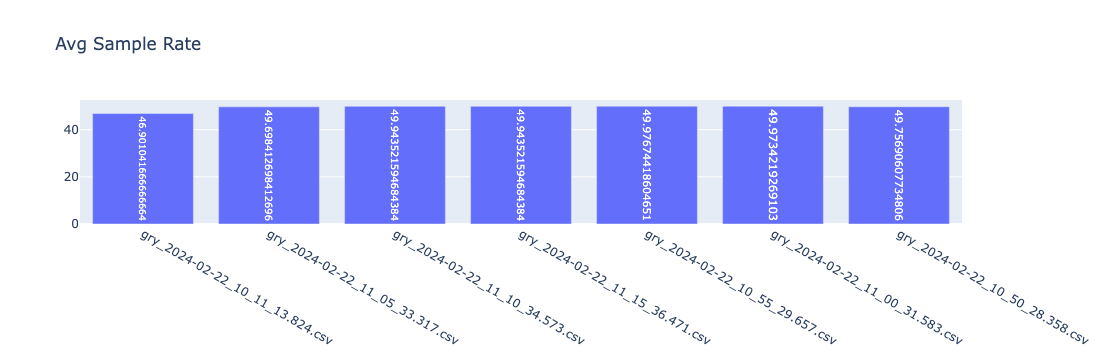

Number of files containing 'gry': 7


In [25]:
file_count_gry = file_count(directory_path, "gry")

file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_11_15_36.4712024-02-22_11_15_36.471.csv
Number of samples per file:  1690
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_11_10_34.5732024-02-22_11_10_34.573.csv
Number of samples per file:  1388
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_11_00_31.5832024-02-22_11_00_31.583.csv
Number of samples per file:  784
file_path =  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-22-2024/heart_rate_2024-02-22_10_50_28.3582024-02-22_10_50_28.358.csv
Number of samples per file:  180
file_path =  /Users/shehjarsad

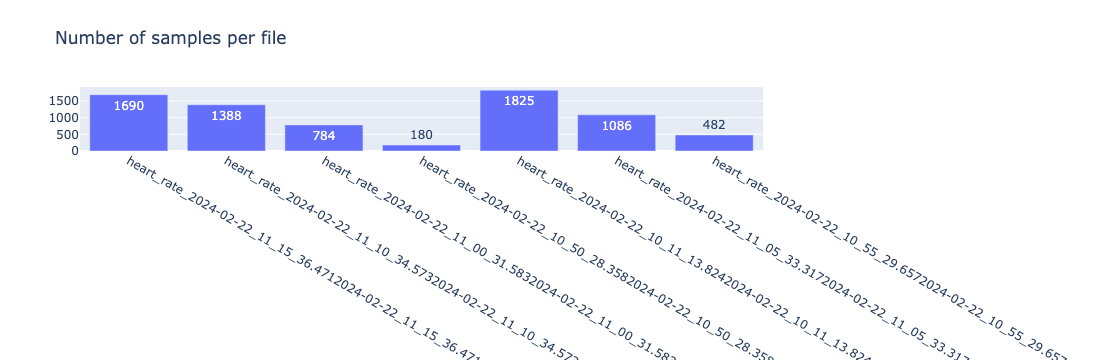

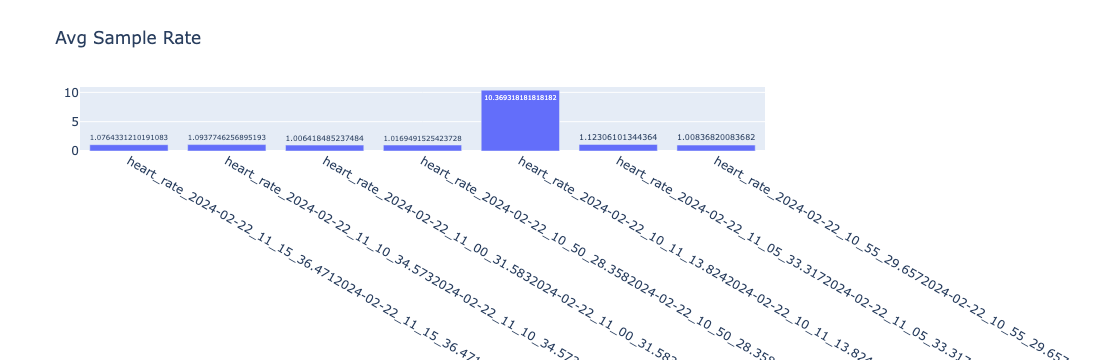

Number of files containing 'heart_rate': 7


In [26]:
file_count_hr = file_count(directory_path, "heart_rate")

In [24]:
df = pd.read_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Carehub/Carewear-DataTesting2024/GalaxtWatchTests/02-05-2024/acc_2024-02-05_14_41_47.820.csv")


In [34]:
subset_df["formatted_timestamp"]

,X,Y,Z,event.timestamp,Timestamp,formatted_timestamp
4679,0.172383,0.179565,9.751583,281432063013133,2024-02-22 14:02:07.996,14:02:07
4677,0.153229,0.193930,9.706094,281432023126658,2024-02-22 14:02:07.994,14:02:07
4676,0.160412,0.148441,9.746795,281432003229197,2024-02-22 14:02:07.992,14:02:07
4675,0.143652,0.114922,9.742006,281431983240184,2024-02-22 14:02:07.980,14:02:07
4674,0.186748,0.177171,9.773131,281431963281688,2024-02-22 14:02:07.973,14:02:07
...,...,...,...,...,...,...
6297,-1.017536,-4.970363,7.424419,286587274722255,2024-02-22 15:28:03.201,15:28:03
6298,0.878672,-5.370194,7.137116,286587294650234,2024-02-22 15:28:03.313,15:28:03
6299,0.524330,-5.951985,8.959103,286587314669765,2024-02-22 15:28:03.369,15:28:03
6292,-4.194642,-19.093758,0.126893,286587175021328,2024-02-22 15:28:03.129,15:28:03


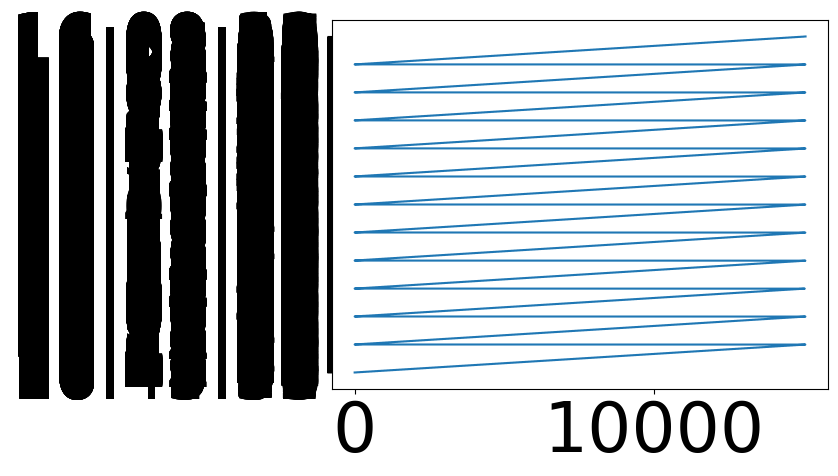

In [42]:

plt.plot(df_lists_acc["formatted_timestamp"])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

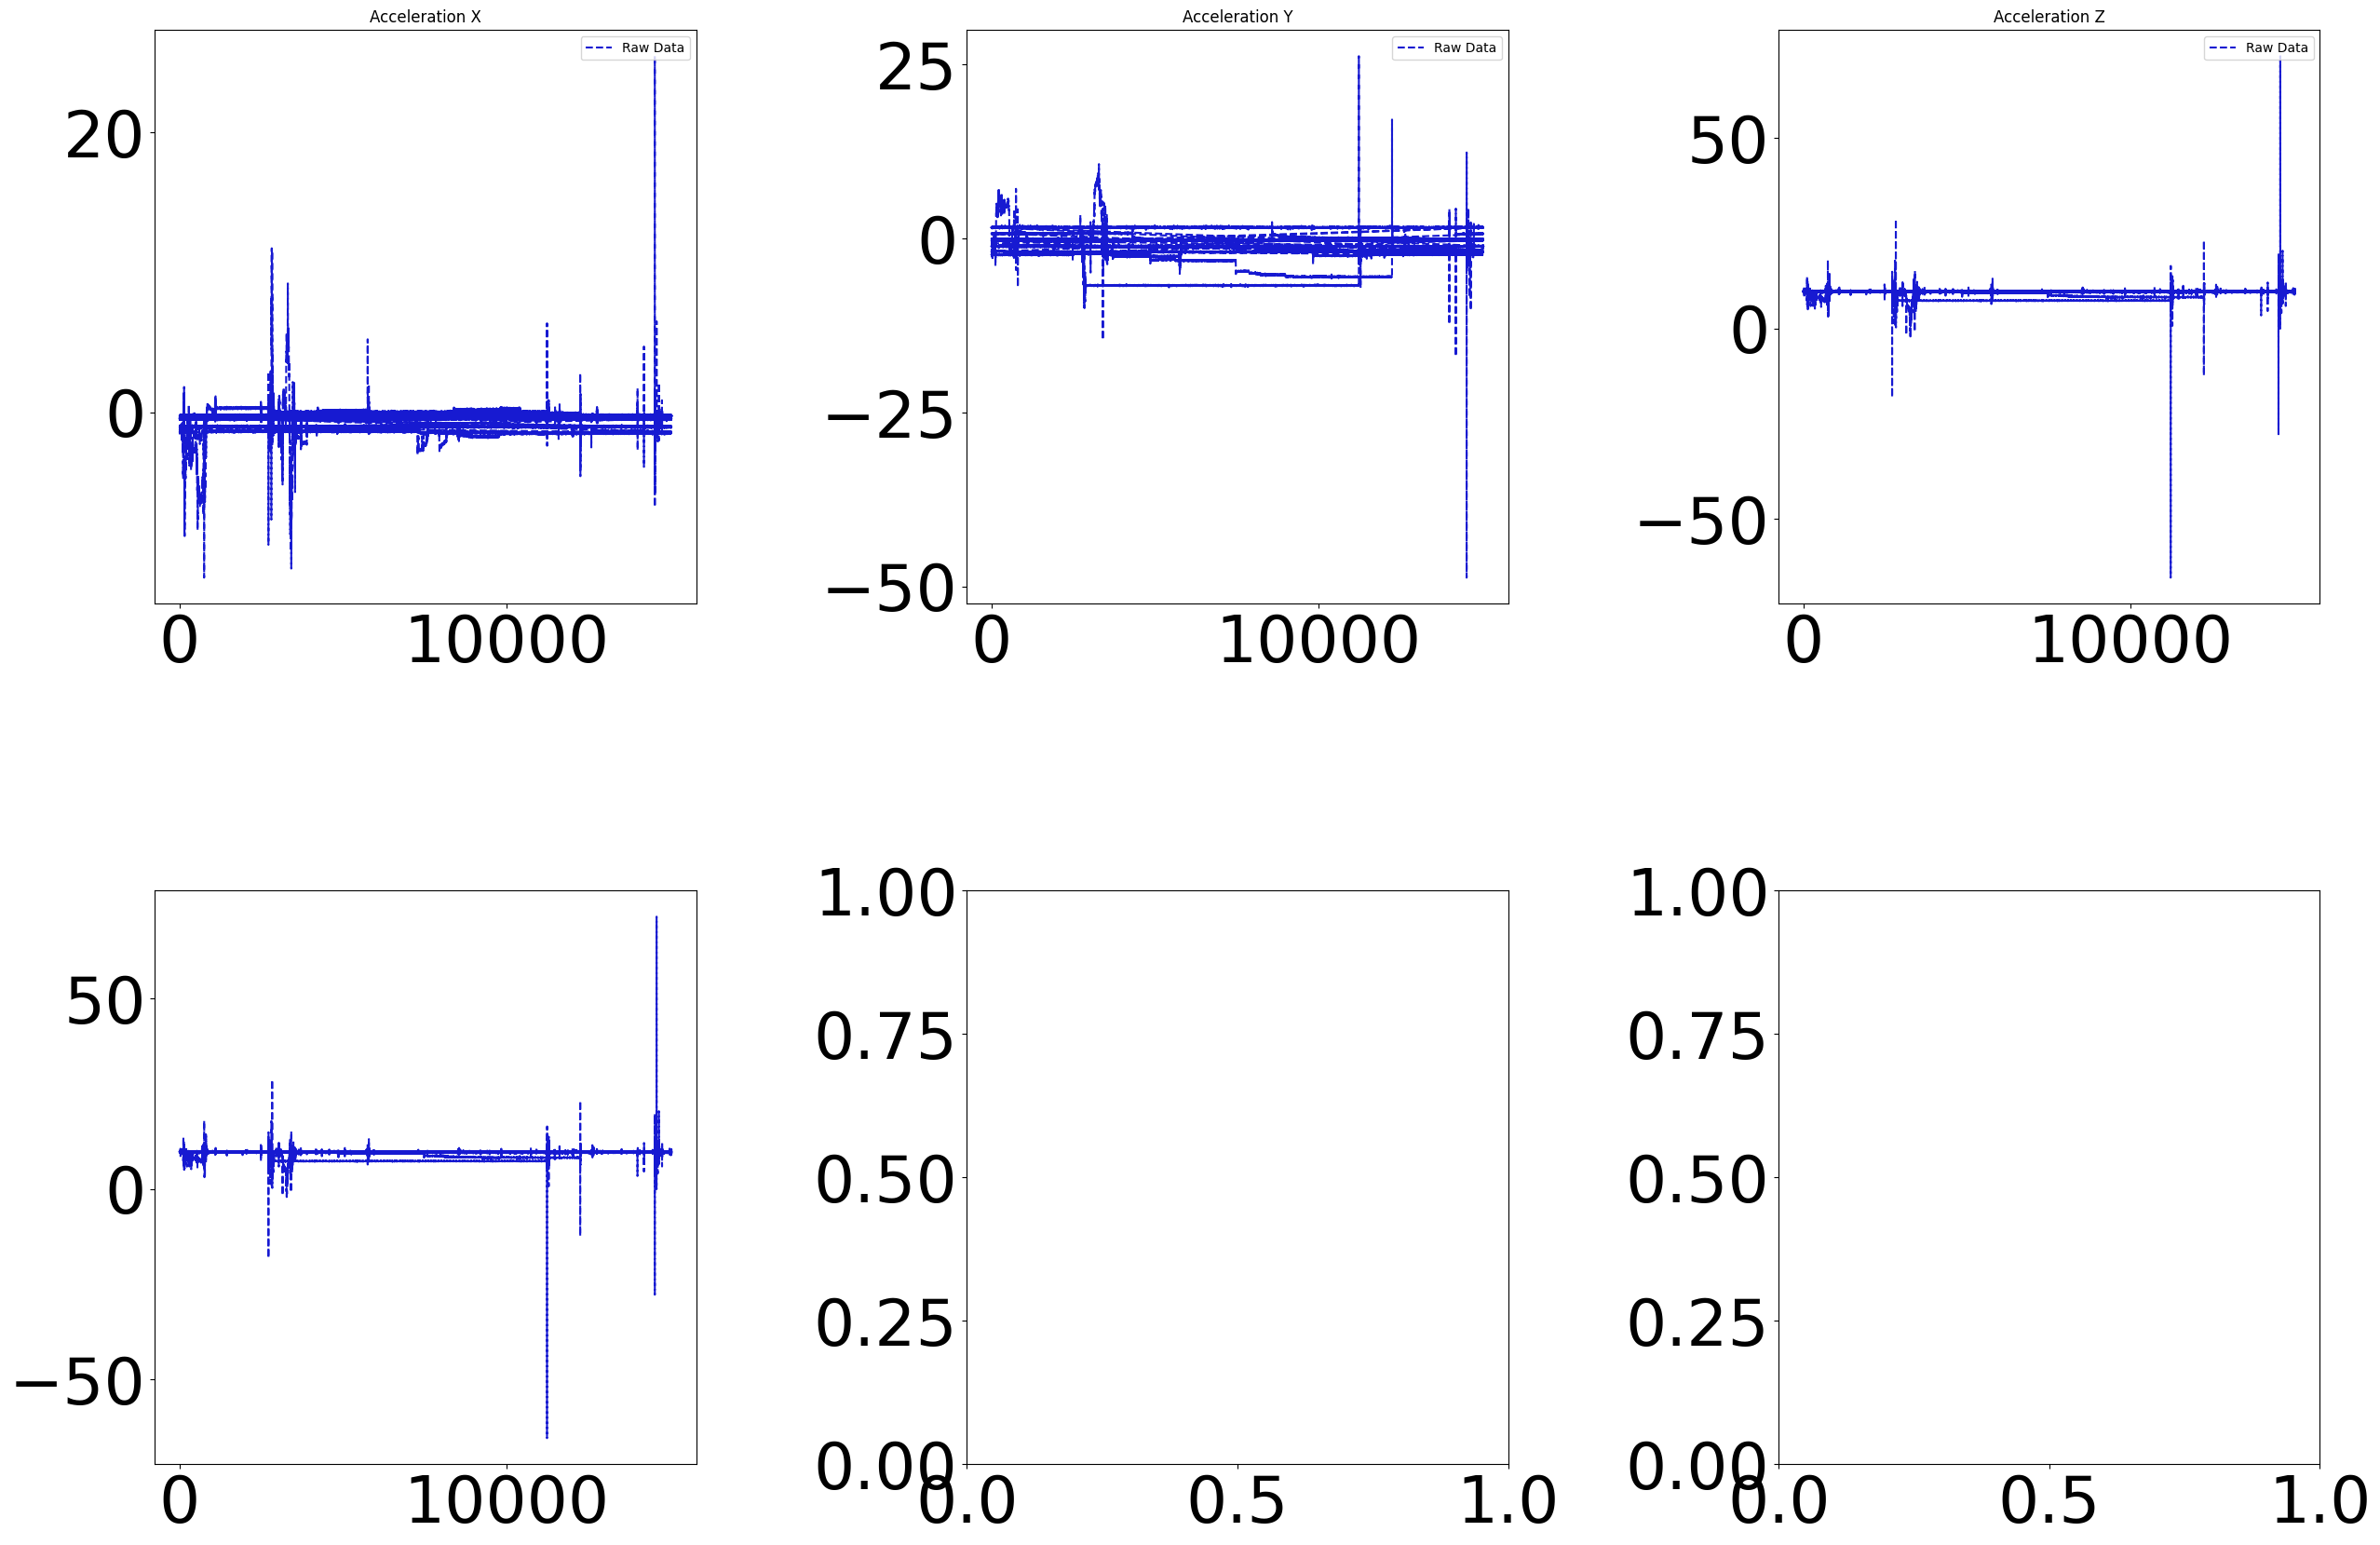

In [38]:
filtering_plots(df_lists_acc)